In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Data Preprocessing

In [4]:
# Read files
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
testing = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

# Get Id in the test file
testId = testing.iloc[:, 0]
display(testId)

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [5]:
display(df.head())
print(df.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)


In [6]:
# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Check number of null values
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
print(testing.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
# Drop cols with too many null values and Id
df = df.drop(columns = ["Id", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"])
print(df.shape)

testing = testing.drop(columns = ["Id", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"])
print(testing.shape)

(1460, 75)
(1459, 74)


In [9]:
# The remaining columns with null values

df_col_with_na = []
testing_col_with_na = []
for col in df.columns:
    if df[col].isnull().any():
        df_col_with_na.append(col)

for col in testing.columns:
    if testing[col].isnull().any():
        testing_col_with_na.append(col)
        
print(df_col_with_na)
print(testing_col_with_na)

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType']


In [10]:
# Categorical Variables
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [11]:
# Fill in missing values with median (numerical var) & mode (categorical var)
def df_fill_na(df):
    for col in df_col_with_na:
        if col in columns:
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    return df

def testing_fill_na(df):
    for col in testing_col_with_na:
        if col in columns:
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    return df

In [12]:
# Reset pandas display options to their defaults
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

df_fill_na(df)
testing_fill_na(testing)
display(df)
display(testing)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


<AxesSubplot: >

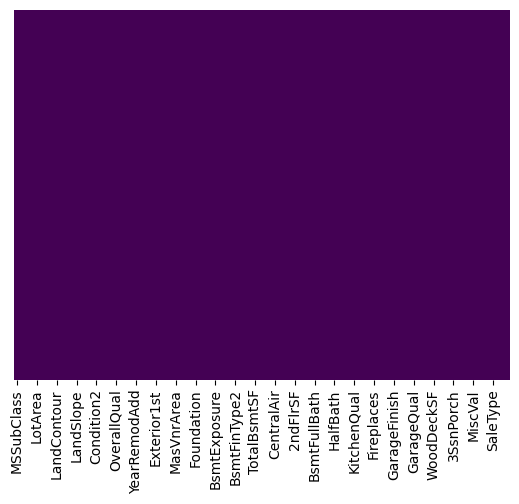

In [13]:
# Check if there is any null value left
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot: >

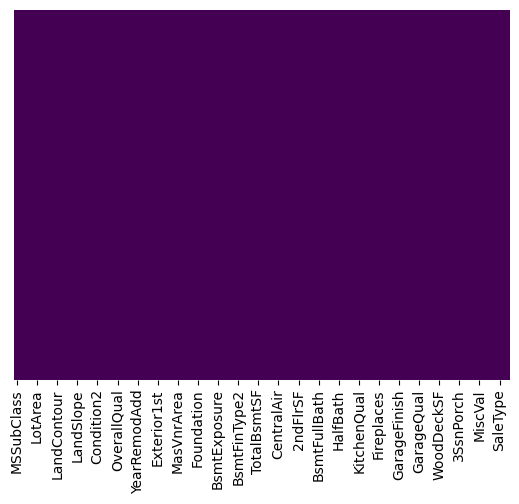

In [14]:
sns.heatmap(testing.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
# Find numerical columns
num_cols = []
for col in df.columns:
    if col not in columns:
        num_cols.append(col)

df_corr = df[num_cols]
df_corr = df_corr.assign(SalePrice = df["SalePrice"])
display(df_corr)

# Compute the correlation matrix with the target variable
corr_matrix = df_corr.corr()['SalePrice'].abs()

# Filter the columns with correlation > 0.5
high_corr_cols = corr_matrix[corr_matrix >= 0.5].index.tolist()
low_corr_cols = corr_matrix[corr_matrix < 0.5].index.tolist()

print(high_corr_cols)
print(low_corr_cols)
print(len(high_corr_cols))
print(len(low_corr_cols))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
11
26


In [16]:
# Drop cols with low correlation values
df = df.drop(columns = low_corr_cols)
testing = testing.drop(columns = low_corr_cols)
print(df.shape)
print(testing.shape)

(1460, 49)
(1459, 48)


In [17]:
# Check variables with mismatched levels between train and test
print(df[columns].nunique() == testing[columns].nunique())


MSZoning          True
Street            True
LotShape          True
LandContour       True
Utilities        False
LotConfig         True
LandSlope         True
Neighborhood      True
Condition2       False
BldgType          True
Condition1        True
HouseStyle       False
SaleType          True
SaleCondition     True
ExterCond         True
ExterQual         True
Foundation        True
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
RoofStyle         True
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
Heating          False
HeatingQC         True
CentralAir        True
Electrical       False
KitchenQual       True
Functional        True
GarageType        True
GarageFinish      True
GarageQual       False
GarageCond        True
PavedDrive        True
dtype: bool


In [18]:
mismatched = ["Utilities", "Condition2", "HouseStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "Heating", "Electrical", "GarageQual"]

In [19]:
for col in df[mismatched].columns:
    print(col)
    print(len(df[col].unique()))
    print(df[col].unique())

Utilities
2
['AllPub' 'NoSeWa']
Condition2
8
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
HouseStyle
8
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofMatl
8
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st
15
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd
16
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
Heating
6
['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
Electrical
5
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
GarageQual
5
['TA' 'Fa' 'Gd' 'Ex' 'Po']


In [20]:
for col in testing[mismatched].columns:
    print(len(testing[col].unique()))
    print(testing[col].unique())

1
['AllPub']
5
['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']
7
['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']
4
['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl']
13
['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' 'CBlock']
15
['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn'
 'Stone']
4
['GasA' 'GasW' 'Grav' 'Wall']
4
['SBrkr' 'FuseA' 'FuseF' 'FuseP']
4
['TA' 'Fa' 'Gd' 'Po']


In [21]:
# Since levels of train > test, extra levels were dropped
drop_mismatched = ['Utilities_NoSeWa', 
                   'Condition2_RRNn', 'Condition2_RRAn', 'Condition2_RRAe',
                  'HouseStyle_2.5Fin',
                  'RoofMatl_Metal', 'RoofMatl_Membran', 'RoofMatl_Roll', 'RoofMatl_ClyTile',
                  'Exterior1st_Stone', 'Exterior1st_ImStucc', 
                  'Exterior2nd_Other',
                  'Heating_OthW', 'Heating_Floor',
                  'Electrical_Mix',
                  'GarageQual_Ex']

In [22]:
# Transform categorical variables to numerical variables
def transform(df):
    df = pd.get_dummies(df, columns = columns)
    
    return df
            

In [23]:
df_copy = df.copy()
df_copy = transform(df_copy)
df_copy = df_copy.drop(columns = drop_mismatched)
display(df_copy)
print(df_copy.shape)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,7,2003,2003,856,856,1710,2,8,2,548,...,0,1,0,0,0,0,1,0,0,1
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,0,1,0,0,0,0,1,0,0,1
2,7,2001,2002,920,920,1786,2,6,2,608,...,0,1,0,0,0,0,1,0,0,1
3,7,1915,1970,756,961,1717,1,7,3,642,...,0,1,0,0,0,0,1,0,0,1
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,...,0,1,0,0,0,0,1,0,0,1
1456,6,1978,1988,1542,2073,2073,2,7,2,500,...,0,1,0,0,0,0,1,0,0,1
1457,7,1941,2006,1152,1188,2340,2,9,1,252,...,0,1,0,0,0,0,1,0,0,1
1458,5,1950,1996,1078,1078,1078,1,5,1,240,...,0,1,0,0,0,0,1,0,0,1


(1460, 229)


In [24]:
testing_copy = testing.copy()
testing_copy = transform(testing_copy)
display(testing_copy)
print(testing_copy.shape)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0,...,0,1,0,0,0,0,1,0,0,1
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0,...,0,1,0,0,0,0,1,0,0,1
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0,...,0,1,0,0,0,0,1,0,0,1
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0,...,0,1,0,0,0,0,1,0,0,1
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,546.0,546,1092,1,5,0.0,0.0,...,0,1,0,0,0,0,1,0,0,1
1455,4,1970,1970,546.0,546,1092,1,6,1.0,286.0,...,0,1,0,0,0,0,1,0,0,1
1456,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0,...,0,1,0,0,0,0,1,0,0,1
1457,5,1992,1992,912.0,970,970,1,6,0.0,0.0,...,0,1,0,0,0,0,1,0,0,1


(1459, 228)


In [25]:
# Checking
df_copy.columns.get_loc('SalePrice')


10

In [26]:
# Perform a train-test-validation split with 60% train, 20% validation, and 20% test data
from sklearn.model_selection import train_test_split
data = df_copy
X = data.drop(columns = ["SalePrice"])
y = data["SalePrice"]
print(y)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Verify the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64
X_train shape: (876, 228)
y_train shape: (876,)
X_val shape: (292, 228)
y_val shape: (292,)
X_test shape: (292, 228)
y_test shape: (292,)


# Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 32604.703545146465


# XG Boost

In [28]:
import xgboost as xgb

# Train an XGBoost regressor
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate the root mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 31932.283814835948


# Ensembel Model of Random Forest, Light GBM, XG Boost

In [90]:
import lightgbm as lgb

# Train a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Train a LightGBM regressor
lgb_regressor = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', metric='rmse',
                                  num_leaves=31, learning_rate=0.05, feature_fraction=0.9)
lgb_regressor.fit(X_train, y_train)

# Train an XGBoost regressor
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set using both models
rf_preds = rf_regressor.predict(X_test)
lgb_preds = lgb_regressor.predict(X_test)
xgb_preds = xgb_regressor.predict(X_test)


# Combine the predictions using a simple average
ensemble_preds = (rf_preds + lgb_preds + xgb_preds) / 3

# Calculate the root mean squared error on the test set for the ensemble model
mse = mean_squared_error(y_test, ensemble_preds)
rmse = np.sqrt(mse)
print(f"Ensemble Root Mean Squared Error: {rmse}")


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
Ensemble Root Mean Squared Error: 27256.705123829986


# Hyperparameters Tuning

In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define the parameter grid for LightGBM
lgb_param_grid = {
    'num_leaves': np.arange(30, 50),
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': [None, 5, 10, 20],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1]
}

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

# Create the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the LightGBM regressor
lgb_regressor = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', metric='rmse')

# Create the XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Define the RandomizedSearchCV object for Random Forest
rf_random = RandomizedSearchCV(estimator=rf_regressor, param_distributions=rf_param_grid, n_iter=50, cv=5, n_jobs=-1, random_state=42)

# Define the RandomizedSearchCV object for LightGBM
lgb_random = RandomizedSearchCV(estimator=lgb_regressor, param_distributions=lgb_param_grid, n_iter=50, cv=5, n_jobs=-1, random_state=42)

# Define the RandomizedSearchCV object for XGBoost
xgb_random = RandomizedSearchCV(estimator=xgb_regressor, param_distributions=xgb_param_grid, n_iter=50, cv=5, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV objects to the data
rf_random.fit(X_train, y_train)
lgb_random.fit(X_train, y_train)
xgb_random.fit(X_train, y_train)

# Get the best parameters for each model
rf_best_params = rf_random.best_params_
lgb_best_params = lgb_random.best_params_
xgb_best_params = xgb_random.best_params_

# Train the Random Forest model with the best parameters
rf_regressor.set_params(**rf_best_params)
rf_regressor.fit(X_train, y_train)

# Train the LightGBM model with the best parameters
lgb_regressor.set_params(**lgb_best_params)
lgb_regressor.fit(X_train, y_train)

# Train an XGBoost regressor
xgb_regressor.set_params(**xgb_best_params)
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set using both models
rf_preds = rf_regressor.predict(X_val)
lgb_preds = lgb_regressor.predict(X_val)
xgb_preds = xgb_regressor.predict(X_val)

# Combine the predictions using a simple average
ensemble_preds = (rf_preds + lgb_preds + xgb_preds) / 3

# Calculate the root mean squared error on the test set for the ensemble model
mse = mean_squared_error(y_val, ensemble_preds)
rmse = np.sqrt(mse)
print(f"Ensemble Root Mean Squared Error: {rmse}")


Ensemble Root Mean Squared Error: 24383.178937211702


In [92]:
# Make predictions on the test set using both models
rf_preds = rf_regressor.predict(testing_copy)
lgb_preds = lgb_regressor.predict(testing_copy)
xgb_preds = xgb_regressor.predict(testing_copy)

# Combine the predictions using a simple average
ensemble_preds = (rf_preds + lgb_preds + xgb_preds) / 3

# Create a pandas DataFrame from the arrays
submission = pd.DataFrame({'Id': testId, 'SalePrice': ensemble_preds})
display(submission)

# Save the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

,Id,SalePrice
0,1461,123807.813591
1,1462,151449.388273
2,1463,174050.057682
3,1464,190459.798247
4,1465,207117.624122
...,...,...
1454,2915,80116.711158
1455,2916,86619.918580
1456,2917,143041.239371
1457,2918,116189.380406
